In [1]:
#https://www.kaggle.com/datasets/safrizalardanaa/produk-ecommerce-indonesia

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/data_produk.csv')

Mounted at /content/drive


In [4]:
df.head()

,item_name,description,category,price,colour,shop_name
0,Sepatu Sneakers,Sepatu Sneakers adalah pilihan yang sempurna u...,Sepatu,100000,Putih,Home Essentials
1,Tas Ransel Stylish,Tas Ransel Stylish memberikan gaya dan fungsi ...,Tas,200000,Merah,Sports World
2,Kemeja Flanel Modern,Kemeja Flanel Modern memberikan tampilan yang ...,Kemeja,150000,Hijau,Gourmet Delights
3,Celana Jeans Slim Fit,Celana Jeans Slim Fit adalah pilihan yang tepa...,Celana,250000,Biru,Gadget Hub
4,Topi Fedora Elegan,Topi Fedora Elegan memberikan sentuhan klasik ...,Topi,50000,Abu-abu,Gourmet Delights


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_name    100 non-null    object
 1   description  100 non-null    object
 2   category     100 non-null    object
 3   price        100 non-null    int64 
 4   colour       100 non-null    object
 5   shop_name    100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [6]:
print("Jumlah toko unik:", df["shop_name"].nunique())

Jumlah toko unik: 25


In [7]:
print("Jumlah kategori unik:", df["category"].nunique())

Jumlah kategori unik: 36


**Analisis**

In [8]:
#jumlah produk per toko

In [9]:
produk_per_toko = df.groupby("shop_name")["item_name"].count().reset_index()
produk_per_toko.columns = ["shop_name", "total_products"]

In [10]:
#jumlah variasi kategori per toko

In [11]:
kategori_per_toko = df.groupby("shop_name")["category"].nunique().reset_index()
kategori_per_toko.columns = ["shop_name", "unique_categories"]

In [12]:
#Gabungan kedua analisis

In [13]:
toko_performance = produk_per_toko.merge(kategori_per_toko, on="shop_name")

In [14]:
#Menampilkan 10 toko dengan jumlah produk terbanyak

In [15]:
toko_performance.index = toko_performance.index + 1
toko_performance.sort_values(by="total_products", ascending=False).head(10)

,shop_name,total_products,unique_categories
1,Artisan Crafts,4,4
2,Beauty Boutique,4,4
3,Book Haven,4,4
4,Fashion House,4,4
5,Fashion Outlet,4,4
6,Fitness Zone,4,4
7,Food Paradise,4,4
8,Gadget Hub,4,4
9,Game Central,4,3
10,Gift Emporium,4,4


**Visualisasi**

<ipython-input-16-fe245bbecb5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_products", y="shop_name", data=top_toko, palette="Greens")


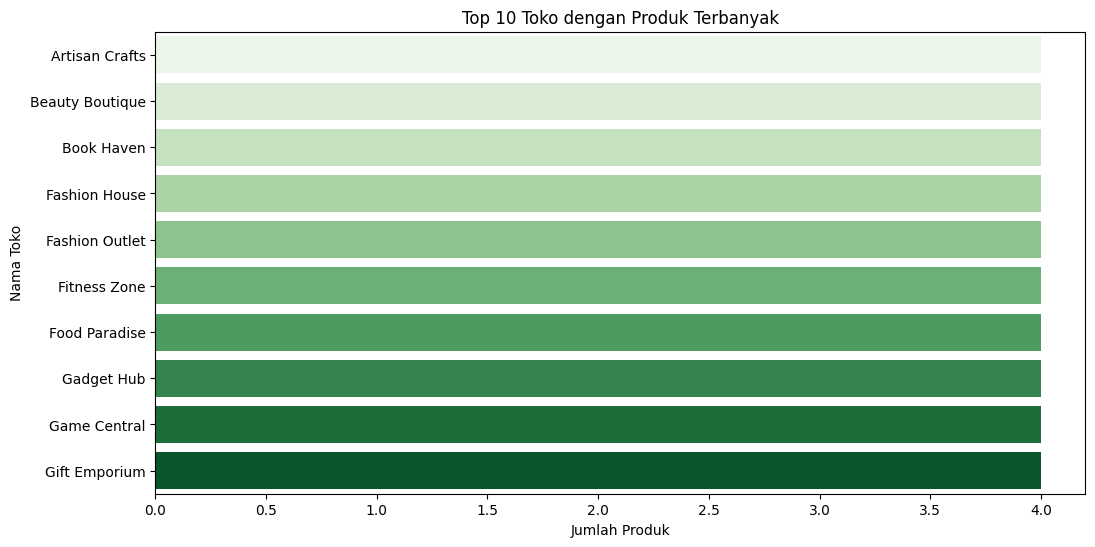

In [16]:
plt.figure(figsize=(12,6))
top_toko = toko_performance.sort_values(by="total_products", ascending=False).head(10)
sns.barplot(x="total_products", y="shop_name", data=top_toko, palette="Greens")
plt.xlabel("Jumlah Produk")
plt.ylabel("Nama Toko")
plt.title("Top 10 Toko dengan Produk Terbanyak")
plt.show()